# Problem statement.

From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, HubeiProvince of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not knowhow it affects people.So daily level information on the affected people can give some interesting insights when it is made available to the broader datascience community. data is available from 1/22/2020 to 2/17/2020.This notebook contain the model fitting of no of people who got corona virus and proved to be confirmedAnd then predict the future possible number of patients.Source of dataset: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [1]:
import numpy as np
import pylab as pl
from numpy import fft

import pandas as pd

df=pd.read_csv('./novel-corona-virus-2019-dataset_new/covid_19_data.csv',parse_dates=['Last Update'])
df.columns = ['Sno','Date','Province/State','Country','Last Update','Confirmed','Deaths','Recovered']


In [2]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
confirmed.columns=['Date','Confirmed']
confirmed['Date']=pd.to_datetime(confirmed['Date'])
confirmed=confirmed.set_index("Date")

In [3]:
confirmed.head()

,Confirmed
Date,
2020-01-22,555.0
2020-01-23,653.0
2020-01-24,941.0
2020-01-25,1438.0
2020-01-26,2118.0


#### extracted information as above format. All indicates deaths and recoverd cases too

In [4]:
a=pd.date_range(start="2020-01-22",end="2020-04-08")
p= [date_obj.strftime('%Y/%m/%d') for date_obj in a]

#### Function to find the fourier function and predicted values . We need two parameters as input. One the sequence we need to analyse. The other is number of predicted values we need to find.  I am giving number of harmonics here as 10 . which indicates i am using most 10 frequencies that influence the function. Later the same stuff as detrending and shifting from time domain to frequency domain .  

#### Here we write one functions depend on trend. This removes trend with 3rd degree polynomial and add to predicted values at the end of the function while returning. This can be linear or quadratic if it returns a good value of predictions. But 3rd degree covers both linear ad quadratic, So i used 3rd degree here. So we are detrending in frequecy domain using fft.fft() function.

#### here n_predict variable is number of values we need to predict. 

In [5]:
def fourierT(x, n_predict):
    n = x.size
    n_harm = 10   # number of harmonics in model
    
    #taking t as n integers from 1 to n 
    t = np.arange(0, n)
    #find trend using polyfit , i adopted degree 3
    p = np.polyfit(t, x, 3)
    #Subtract the trend found above
    x_notrend = x - ((p[0] * (t*t*t)) + (p[1]*(t**2)) + (p[2]*t)+p[3])        # detrended x
    # detrended x in frequency domain
    x_freqdom = fft.fft(x_notrend)  #Return the Discrete Fourier Transform sample frequencies.
    f = fft.fftfreq(n)              # Return the Discrete Fourier Transform sample frequencies.
    
    
    indexes = list(range(n))
    indexes = np.array(range(0,n))
    indexes=sorted(indexes,key = lambda i: np.absolute(f[i])) 
    
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)  #initialize to zero
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude calculation
        phase = np.angle(x_freqdom[i])          # phase calculation
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)  # restored sig is Acos(2*pi*f*t + phase)
    return restored_sig + ((p[0] * (t*t*t)) + (p[1]*(t**2)) + (p[2]*t)+p[3])  # add the trend and return

#### main function to import data set and extract required dataframe form.  And then plotting the sequence and actual values.


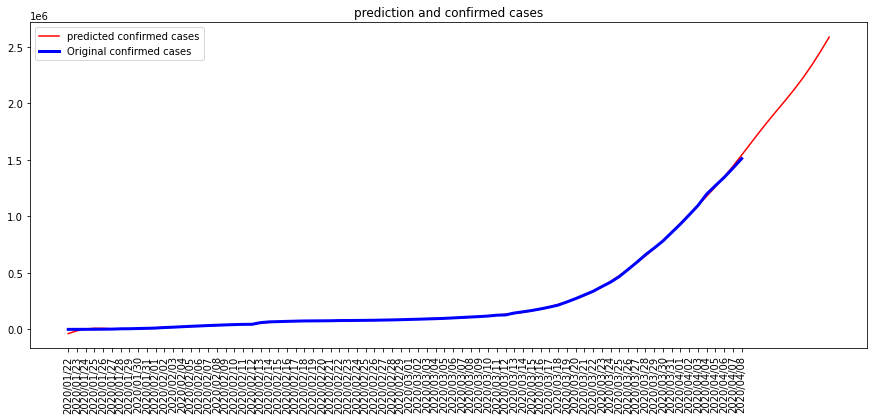

In [6]:
def main():
    df=pd.read_csv('./novel-corona-virus-2019-dataset_new/covid_19_data.csv',parse_dates=['Last Update'])
    df.columns = ['Sno','Date','Province/State','Country','Last Update','Confirmed','Deaths','Recovered']    
    confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
    confirmed.columns=['Date','Confirmed']
    confirmed['Date']=pd.to_datetime(confirmed['Date'])
    confirmed=confirmed.set_index("Date")
    x=confirmed['Confirmed']
    x = confirmed['Confirmed'].tolist()
    
    x=np.array(x)
    n_predict = 10
    predictions = fourierT(x, n_predict)
    
    fig = pl.figure(figsize=(15,6))
    ax1 = fig.add_subplot() 
    ax1.tick_params(axis ='x', rotation = 90) 
    pl.title("prediction and confirmed cases")
    pl.plot(np.arange(0, predictions.size), predictions, 'r', label = 'predicted confirmed cases')
    pl.plot(p, x, 'b', label = 'Original confirmed cases', linewidth = 3)
    pl.legend()
    pl.show()
    
if __name__ == "__main__":
    main()

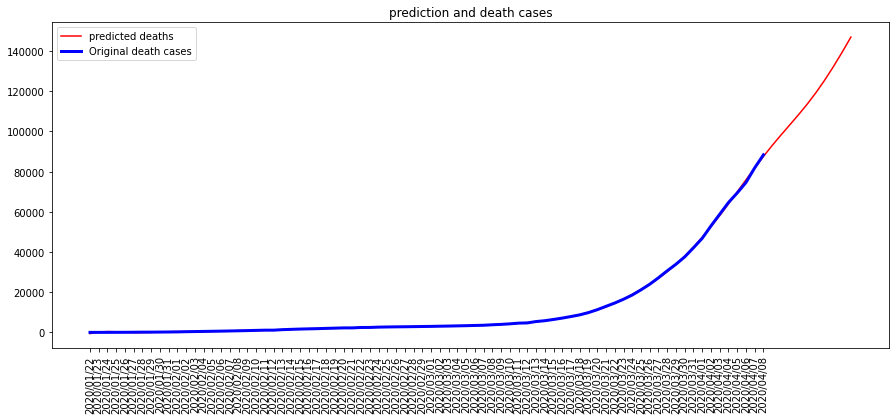

In [7]:
def main():
    df=pd.read_csv('./novel-corona-virus-2019-dataset_new/covid_19_data.csv',parse_dates=['Last Update'])
    df.columns = ['Sno','Date','Province/State','Country','Last Update','Confirmed','Deaths','Recovered']    
    deaths=df.groupby('Date').sum()['Deaths'].reset_index()
    deaths.columns=['Date','Deaths']
    deaths['Date']=pd.to_datetime(deaths['Date'])
    deaths=deaths.set_index("Date")
    x=deaths['Deaths']
    x = deaths['Deaths'].tolist()
    
    x=np.array(x)
    n_predict = 10
    predictions = fourierT(x, n_predict)
    
    fig = pl.figure(figsize=(15,6))
    ax1 = fig.add_subplot() 
    ax1.tick_params(axis ='x', rotation = 90) 
    pl.title("prediction and death cases")
    pl.plot(np.arange(0, predictions.size), predictions, 'r', label = 'predicted deaths')
    pl.plot(p, x, 'b', label = 'Original death cases', linewidth = 3)
    pl.legend()
    pl.show()
    
if __name__ == "__main__":
    main()

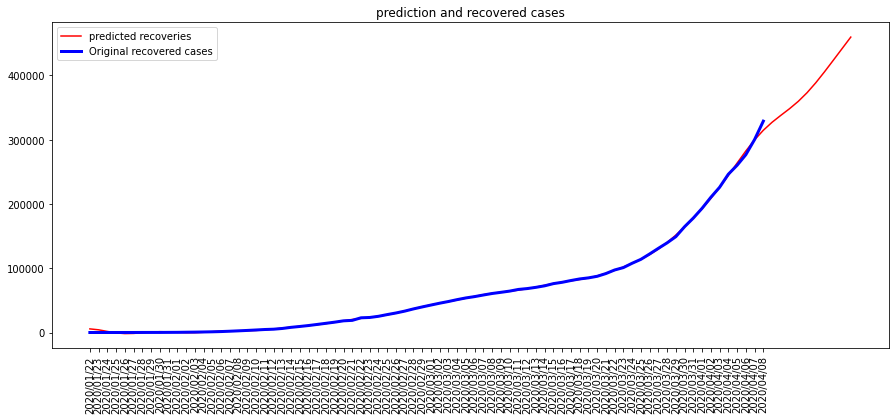

In [8]:
def main():
    df=pd.read_csv('./novel-corona-virus-2019-dataset_new/covid_19_data.csv',parse_dates=['Last Update'])
    df.columns = ['Sno','Date','Province/State','Country','Last Update','Confirmed','Deaths','Recovered']    
    recovered=df.groupby('Date').sum()['Recovered'].reset_index()
    recovered.columns=['Date','Recovered']
    recovered['Date']=pd.to_datetime(recovered['Date'])
    recovered=recovered.set_index("Date")
    x=recovered['Recovered']
    x = recovered['Recovered'].tolist()
    
    x=np.array(x)
    n_predict = 10
    predictions = fourierT(x, n_predict)


    fig = pl.figure(figsize=(15,6))
    ax1 = fig.add_subplot() 
    ax1.tick_params(axis ='x', rotation = 90) 
    pl.title("prediction and recovered cases")
    pl.plot(np.arange(0, predictions.size), predictions, 'r', label = 'predicted recoveries')
    pl.plot(p, x, 'b', label = 'Original recovered cases', linewidth = 3)
    pl.legend()
    pl.show()
    
if __name__ == "__main__":
    main()